In [14]:
from pandas_datareader import DataReader # pip install pandas-datareader
from pandas_datareader import data
from datetime import datetime

import pandas as pd
import plotly as ply
 
start = pd.to_datetime('2010-01-01') # in YYYY-MM-DD format
end = pd.to_datetime('today')
ts = data.DataReader('NDAQ', 'yahoo', start , end) # here 'yahoo' is the API to yahoo
ts = ts['Adj Close']

<AxesSubplot:title={'center':'NDAQ 2010-2021'}, xlabel='Date'>

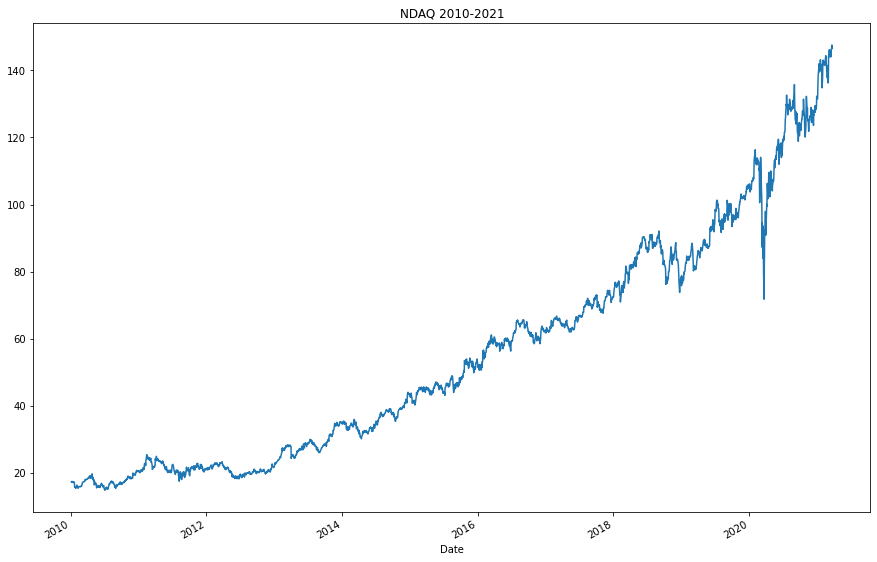

In [16]:
ts.plot(figsize=(15,10), title = "NDAQ 2010-2021")
#PLAIN DATA

In [18]:
#showing skew of original data 
skew(ts)

0.7165245859741516

In [24]:
#Python3 code to show Box-cox Transformation  
# of non-normal data 
  
# import modules 
import numpy as np 
from scipy import stats 
from scipy.stats import skew

import seaborn as sns  
    
# transform training data & save lambda value 
fitted_data, fitted_lambda = stats.boxcox(ts) 
#showing skew of transformed data 
skew(fitted_data)


-0.009667135591095116

/Users/lukeseckerson/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Adj Close', ylabel='Density'>

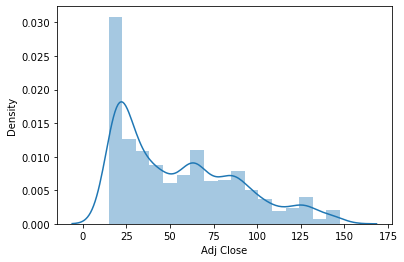

In [22]:
#plot of oringal data 
sns.distplot(ts)

/Users/lukeseckerson/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

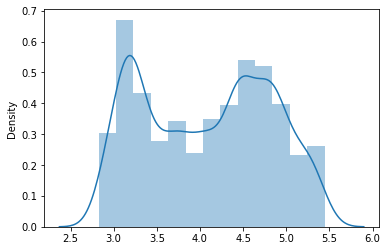

In [23]:
#plot of transformed data
sns.distplot(fitted_data)

/Users/lukeseckerson/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

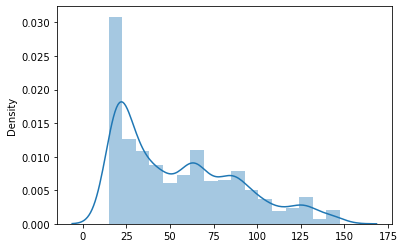

In [27]:
#reverting back to orginal data 
#y = (x*lambda + 1)^(1/lambda)

restoredData = (fitted_data*fitted_lambda +1)**(1/fitted_lambda)
sns.distplot(restoredData)

/Users/lukeseckerson/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/lukeseckerson/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: 0.0757144025412197


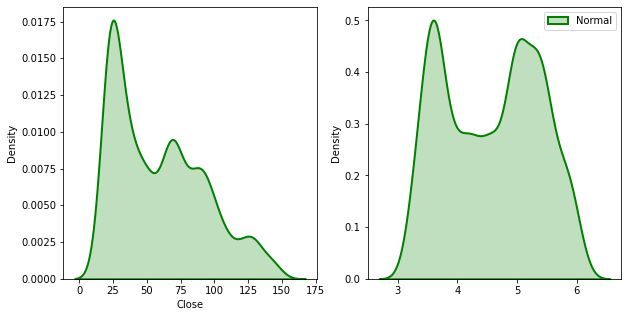

In [61]:
#Python3 code to show Box-cox Transformation  
# of non-normal data 
  
# import modules 
import numpy as np 
from scipy import stats 
  
# plotting modules 
import seaborn as sns 
import matplotlib.pyplot as plt 
  
# generate non-normal data (exponential)  
  
# transform training data & save lambda value 
fitted_data, fitted_lambda = stats.boxcox(ts.Close) 
  
# creating axes to draw plots 
fig, ax = plt.subplots(1, 2) 
  
# plotting the original data(non-normal) and  
# fitted data (normal) 
sns.distplot(ts.Close, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="green", ax = ax[0]) 
  
sns.distplot(fitted_data, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green", ax = ax[1]) 
  
# adding legends to the subplots 
plt.legend(loc = "upper right") 
  
# rescaling the subplots 
fig.set_figheight(5) 
fig.set_figwidth(10) 
  
print(f"Lambda value used for Transformation: {fitted_lambda}") 

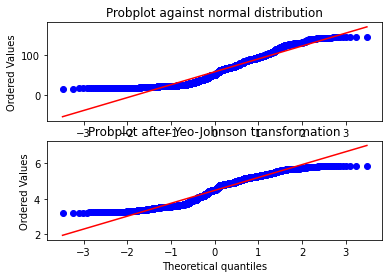

In [66]:
from scipy import stats
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(211)
x = stats.loggamma.rvs(5, size=500) + 5
prob = stats.probplot(ts.Close, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
xt, lmbda = stats.yeojohnson(ts.Close)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Yeo-Johnson transformation')

plt.show()